In [1]:
#Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv("FULLTRAIN.csv")#full train is merger of all the metadata except payment_cashout_fail

In [2]:
df = df[df.columns.drop(list(df.filter(regex="Unnamed")))]
df.head()

,cust_id,target,fraud_update_features_1,fraud_update_features_2,fraud_update_features_3,fraud_update_features_6,fraud_update_features_7,fraud_update_features_8,fraud_update_features_9,fraud_update_features_10,fraud_update_features_11,fraud_update_features_13,fraud_update_features_14,fraud_update_features_20,new_acct_fi_1,new_acct_fi_2,new_acct_fi_3,new_acct_fi_4,new_acct_fi_5,new_acct_fi_6,new_acct_fi_7,new_acct_fi_8,new_acct_fi_9,new_acct_fi_10,new_acct_fi_11,new_acct_fi_12,new_acct_fi_13,new_acct_fi_14,new_acct_fi_15,new_acct_fi_16,new_acct_fi_17,new_acct_memo_rcv_1,new_acct_memo_rcv_2,new_acct_memo_rcv_3,new_acct_memo_rcv_4,new_acct_memo_rcv_5,new_acct_memo_rcv_6,new_acct_memo_rcv_7,new_acct_memo_rcv_8,new_acct_memo_rcv_9,new_acct_memo_rcv_10,new_acct_memo_rcv_11,new_acct_memo_rcv_12,new_acct_memo_rcv_13,new_acct_memo_rcv_14,new_acct_memo_rcv_15,new_acct_memo_rcv_16,new_acct_memo_rcv_17,new_acct_memo_rcv_18,new_acct_memo_rcv_19,new_acct_memo_rcv_20,new_acct_memo_rcv_21,new_acct_memo_rcv_22,new_acct_memo_rcv_23,new_acct_memo_rcv_24,new_acct_memo_rcv_25,new_acct_memo_rcv_26,new_acct_memo_rcv_27,new_acct_memo_rcv_28,new_acct_memo_rcv_29,new_acct_memo_rcv_30,new_acct_memo_rcv_31,new_acct_memo_rcv_32,new_acct_memo_rcv_33,new_acct_memo_rcv_34,new_acct_memo_rcv_35,new_acct_memo_rcv_36,new_acct_memo_rcv_37,new_acct_memo_rcv_38,new_acct_memo_rcv_39,new_acct_memo_rcv_40,new_acct_memo_rcv_41,new_acct_memo_rcv_42,new_acct_memo_rcv_43,new_acct_memo_rcv_44,new_acct_memo_rcv_45,new_acct_memo_rcv_46,new_acct_memo_rcv_47,new_acct_memo_rcv_48,new_acct_memo_rcv_49,new_acct_memo_rcv_50,new_acct_memo_rcv_51,new_acct_memo_rcv_52,new_acct_memo_sent_1,new_acct_memo_sent_2,new_acct_memo_sent_3,new_acct_memo_sent_4,new_acct_memo_sent_5,new_acct_memo_sent_6,new_acct_memo_sent_7,new_acct_memo_sent_8,new_acct_memo_sent_9,new_acct_memo_sent_10,new_acct_memo_sent_11,new_acct_memo_sent_12,new_acct_memo_sent_13,new_acct_memo_sent_14,new_acct_memo_sent_15,new_acct_memo_sent_16,new_acct_memo_sent_17,new_acct_memo_sent_18,new_acct_memo_sent_19,new_acct_memo_sent_20,new_acct_memo_sent_21,new_acct_memo_sent_22,new_acct_memo_sent_23,new_acct_memo_sent_24,new_acct_memo_sent_25,new_acct_memo_sent_26,new_acct_memo_sent_27,new_acct_memo_sent_28,new_acct_memo_sent_29,new_acct_memo_sent_30,new_acct_memo_sent_31,new_acct_memo_sent_32,new_acct_memo_sent_33,new_acct_memo_sent_34,new_acct_memo_sent_35,new_acct_memo_sent_36,new_acct_memo_sent_37,new_acct_memo_sent_38,new_acct_memo_sent_39,new_acct_memo_sent_40,new_acct_memo_sent_41,new_acct_memo_sent_42,new_acct_memo_sent_43,new_acct_memo_sent_44,new_acct_memo_sent_45,new_acct_memo_sent_46,new_acct_memo_sent_47,new_acct_memo_sent_48,new_acct_memo_sent_49,new_acct_memo_sent_50,new_acct_memo_sent_51,new_acct_memo_sent_52,acct_receiver_1,acct_receiver_2,acct_receiver_3,acct_receiver_4,acct_receiver_5,acct_receiver_6,acct_receiver_7,acct_receiver_8,acct_receiver_9,acct_receiver_10,acct_receiver_11,acct_receiver_12,acct_receiver_13,acct_receiver_14,acct_receiver_15,acct_receiver_16,acct_receiver_17,acct_receiver_18,acct_receiver_19,acct_receiver_20,acct_receiver_21,acct_receiver_22,acct_receiver_23,acct_receiver_24,acct_receiver_25,acct_receiver_26,acct_receiver_27,acct_receiver_28,acct_receiver_29,acct_receiver_30,acct_receiver_31,acct_receiver_32,acct_receiver_33,acct_receiver_34,acct_receiver_35,acct_receiver_36,acct_receiver_37,acct_receiver_38,acct_receiver_39,acct_receiver_40,acct_receiver_41,acct_receiver_42,acct_receiver_43,acct_receiver_44,acct_receiver_45,acct_receiver_46,acct_receiver_47,acct_receiver_48,acct_receiver_49,acct_receiver_50,acct_receiver_51,acct_receiver_52,acct_receiver_53,acct_receiver_54,acct_receiver_55,acct_receiver_56,acct_receiver_57,acct_receiver_58,acct_receiver_59,acct_receiver_60,acct_receiver_61,acct_receiver_62,acct_receiver_63,acct_receiver_64,acct_receiver_65,acct_receiver_66,acct_receiver_67,acct_receiver_68,acct_receiver_69,acct_receiver_70,acct_receiver_71,acct_receiver_72,acct_receive

In [3]:
df.shape

(720000, 326)

In [4]:
missing_value_count = df.isnull().sum()
missing_value_count[1:400]

target                           0
fraud_update_features_1      21594
fraud_update_features_2      21594
fraud_update_features_3      21594
fraud_update_features_6      21594
fraud_update_features_7      21594
fraud_update_features_8      21594
fraud_update_features_9      21594
fraud_update_features_10     21594
fraud_update_features_11     21594
fraud_update_features_13     21594
fraud_update_features_14     21594
fraud_update_features_20     21594
new_acct_fi_1               264702
new_acct_fi_2               264702
new_acct_fi_3               264702
new_acct_fi_4               264702
new_acct_fi_5               264702
new_acct_fi_6               264702
new_acct_fi_7               264702
new_acct_fi_8               264702
new_acct_fi_9               264702
new_acct_fi_10              264702
new_acct_fi_11              264702
new_acct_fi_12              264702
new_acct_fi_13              264702
new_acct_fi_14              264702
new_acct_fi_15              264702
new_acct_fi_16      

In [5]:
 df.describe()   

,cust_id,target,fraud_update_features_1,fraud_update_features_2,fraud_update_features_3,fraud_update_features_6,fraud_update_features_7,fraud_update_features_8,fraud_update_features_9,fraud_update_features_10,fraud_update_features_11,fraud_update_features_13,fraud_update_features_14,fraud_update_features_20,new_acct_fi_1,new_acct_fi_2,new_acct_fi_3,new_acct_fi_4,new_acct_fi_5,new_acct_fi_6,new_acct_fi_7,new_acct_fi_8,new_acct_fi_9,new_acct_fi_10,new_acct_fi_11,new_acct_fi_12,new_acct_fi_13,new_acct_fi_14,new_acct_fi_15,new_acct_fi_16,new_acct_fi_17,new_acct_memo_rcv_1,new_acct_memo_rcv_2,new_acct_memo_rcv_3,new_acct_memo_rcv_4,new_acct_memo_rcv_5,new_acct_memo_rcv_6,new_acct_memo_rcv_7,new_acct_memo_rcv_8,new_acct_memo_rcv_9,new_acct_memo_rcv_10,new_acct_memo_rcv_11,new_acct_memo_rcv_12,new_acct_memo_rcv_13,new_acct_memo_rcv_14,new_acct_memo_rcv_15,new_acct_memo_rcv_16,new_acct_memo_rcv_17,new_acct_memo_rcv_18,new_acct_memo_rcv_19,new_acct_memo_rcv_20,new_acct_memo_rcv_21,new_acct_memo_rcv_22,new_acct_memo_rcv_23,new_acct_memo_rcv_24,new_acct_memo_rcv_25,new_acct_memo_rcv_26,new_acct_memo_rcv_27,new_acct_memo_rcv_28,new_acct_memo_rcv_29,new_acct_memo_rcv_30,new_acct_memo_rcv_31,new_acct_memo_rcv_32,new_acct_memo_rcv_33,new_acct_memo_rcv_34,new_acct_memo_rcv_35,new_acct_memo_rcv_36,new_acct_memo_rcv_37,new_acct_memo_rcv_38,new_acct_memo_rcv_39,new_acct_memo_rcv_40,new_acct_memo_rcv_41,new_acct_memo_rcv_42,new_acct_memo_rcv_43,new_acct_memo_rcv_44,new_acct_memo_rcv_45,new_acct_memo_rcv_46,new_acct_memo_rcv_47,new_acct_memo_rcv_48,new_acct_memo_rcv_49,new_acct_memo_rcv_50,new_acct_memo_rcv_51,new_acct_memo_rcv_52,new_acct_memo_sent_1,new_acct_memo_sent_2,new_acct_memo_sent_3,new_acct_memo_sent_4,new_acct_memo_sent_5,new_acct_memo_sent_6,new_acct_memo_sent_7,new_acct_memo_sent_8,new_acct_memo_sent_9,new_acct_memo_sent_10,new_acct_memo_sent_11,new_acct_memo_sent_12,new_acct_memo_sent_13,new_acct_memo_sent_14,new_acct_memo_sent_15,new_acct_memo_sent_16,new_acct_memo_sent_17,new_acct_memo_sent_18,new_acct_memo_sent_19,new_acct_memo_sent_20,new_acct_memo_sent_21,new_acct_memo_sent_22,new_acct_memo_sent_23,new_acct_memo_sent_24,new_acct_memo_sent_25,new_acct_memo_sent_26,new_acct_memo_sent_27,new_acct_memo_sent_28,new_acct_memo_sent_29,new_acct_memo_sent_30,new_acct_memo_sent_31,new_acct_memo_sent_32,new_acct_memo_sent_33,new_acct_memo_sent_34,new_acct_memo_sent_35,new_acct_memo_sent_36,new_acct_memo_sent_37,new_acct_memo_sent_38,new_acct_memo_sent_39,new_acct_memo_sent_40,new_acct_memo_sent_41,new_acct_memo_sent_42,new_acct_memo_sent_43,new_acct_memo_sent_44,new_acct_memo_sent_45,new_acct_memo_sent_46,new_acct_memo_sent_47,new_acct_memo_sent_48,new_acct_memo_sent_49,new_acct_memo_sent_50,new_acct_memo_sent_51,new_acct_memo_sent_52,acct_receiver_1,acct_receiver_2,acct_receiver_3,acct_receiver_4,acct_receiver_5,acct_receiver_6,acct_receiver_7,acct_receiver_8,acct_receiver_9,acct_receiver_10,acct_receiver_11,acct_receiver_12,acct_receiver_13,acct_receiver_14,acct_receiver_15,acct_receiver_16,acct_receiver_17,acct_receiver_18,acct_receiver_19,acct_receiver_20,acct_receiver_21,acct_receiver_22,acct_receiver_23,acct_receiver_24,acct_receiver_25,acct_receiver_26,acct_receiver_27,acct_receiver_28,acct_receiver_29,acct_receiver_30,acct_receiver_31,acct_receiver_32,acct_receiver_33,acct_receiver_34,acct_receiver_35,acct_receiver_36,acct_receiver_37,acct_receiver_38,acct_receiver_39,acct_receiver_40,acct_receiver_41,acct_receiver_42,acct_receiver_43,acct_receiver_44,acct_receiver_45,acct_receiver_46,acct_receiver_47,acct_receiver_48,acct_receiver_49,acct_receiver_50,acct_receiver_51,acct_receiver_52,acct_receiver_53,acct_receiver_54,acct_receiver_55,acct_receiver_56,acct_receiver_57,acct_receiver_58,acct_receiver_59,acct_receiver_60,acct_receiver_61,acct_receiver_62,acct_receiver_63,acct_receiver_64,acct_receiver_65,acct_receiver_66,acct_receiver_67,acct_receiver_68,acct_receiver_69,acct_receiver_70,acct_receiver_71,acct_receiver_72,acct_receive

In [6]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))




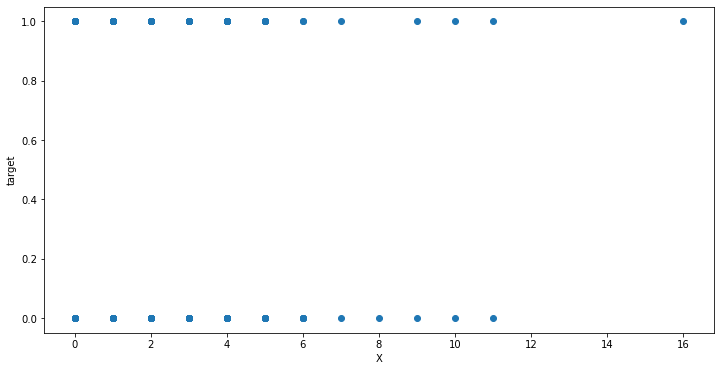

In [8]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['fraud_update_features_1'],df['target'])
ax.set_xlabel('X')
ax.set_ylabel('target')
plt.show()

In [9]:
param_grid = {
        'min_child_weight': [5],
        'gamma': [0.5],
        'subsample': [1.0],
        'colsample_bytree': [ 0.8],
        'max_depth': [4]
        }

In [10]:
model = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [11]:
y = df['target']
X = df.drop(['cust_id','target'],axis = 'columns')

In [ ]:
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

start_time = timer(None) 
random_search.fit(X, y)
timer(start_time)

C:\Users\bhava\OneDrive\anakonda\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)